In [21]:
import pandas as pd 
import numpy as np  
from sklearn.linear_model import LinearRegression
 
import pandas as pd 
import numpy as np  
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns


Download dataset

In [2]:
airData = pd.read_csv('listingsParis.csv' , delimiter = ',')
airData.head(1)

C:\Users\Florence\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (43,61,62) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3109,https://www.airbnb.com/rooms/3109,20200315231126,2020-03-16,zen and calm,Appartement très calme de 50M2 Utilisation de ...,I bedroom appartment in Paris 14,I bedroom appartment in Paris 14 Good restaura...,none,Good restaurants very close the Montparnasse S...,...,f,f,flexible,f,f,1,1,0,0,0.23


Define the columns that we keep :

In [3]:
columnsToKeep = ['id', 'name', 'space', 'description','neighbourhood_cleansed', 
                   'latitude', 'longitude', 'square_feet','price']
airDataUsed = airData[columnsToKeep].set_index('id')
airDataUsed.head()

,name,space,description,neighbourhood_cleansed,latitude,longitude,square_feet,price
id,,,,,,,,
3109,zen and calm,I bedroom appartment in Paris 14,I bedroom appartment in Paris 14 Good restaura...,Observatoire,48.83349,2.31852,NaN,$60.00
5396,Explore the heart of old Paris,"Small, well appointed studio apartment at the ...","Cozy, well-appointed and graciously designed s...",Hôtel-de-Ville,48.85100,2.35869,NaN,$115.00
7397,MARAIS - 2ROOMS APT - 2/4 PEOPLE,PLEASE ASK ME BEFORE TO MAKE A REQUEST !!! No ...,"VERY CONVENIENT, WITH THE BEST LOCATION ! PLEA...",Hôtel-de-Ville,48.85758,2.35275,NaN,$119.00
7964,Large & sunny flat with balcony !,hello ! We have a great 75 square meter apartm...,Very large & nice apartment all for you! - Su...,Opéra,48.87417,2.34245,0.0,$130.00
9359,"Cozy, Central Paris: WALK or VELIB EVERYWHERE !","Since I live in the USA, it is difficult to ma...",Location! Location! Location! Just bring your ...,Louvre,48.85899,2.34735,350.0,$75.00


In [4]:
airDataUsed.price = airDataUsed.price.str.replace('$', '').str.replace(',', '').astype(float)

Check Nan's in "square_feet" column

In [5]:
squaredata = airDataUsed.square_feet.isna().sum()
print("There are {} NaN in square feet column.".format(squaredata))

There are 66291 NaN in square feet column.


Extract information from the description column

In [6]:
airDataUsed['size'] = airDataUsed['description'].str.extract('(\d{2,3}\s?[smSM])', expand=True)
airDataUsed['size'] = airDataUsed['size'].str.replace("\D", "")

# change datatype of size into float
airDataUsed['size'] = airDataUsed['size'].astype(float)

print('NaNs in size_column absolute:     ', airDataUsed['size'].isna().sum())
print('NaNs in size_column in percentage:', round(airDataUsed['size'].isna().sum()/len(airDataUsed),3), '%')

NaNs in size_column absolute:      25794
NaNs in size_column in percentage: 0.383 %


In [7]:
airDataUsed[['description', 'size']].head(10)

,description,size
id,,
3109,I bedroom appartment in Paris 14 Good restaura...,15.0
5396,"Cozy, well-appointed and graciously designed s...",30.0
7397,"VERY CONVENIENT, WITH THE BEST LOCATION ! PLEA...",40.0
7964,Very large & nice apartment all for you! - Su...,75.0
9359,Location! Location! Location! Just bring your ...,10.0
9952,"Je suis une dame retraitée, qui propose un agr...",30.0
10586,BAIL MOBILITE 30 days (1 month) to 300 ...,10.0
10588,LONG TERM RENTAL 12 MONTHS - 9 MONTHS for STU...,12.0
10710,Very close to Place de la Concorde and Madelei...,NaN


In [8]:
airDataUsed.drop(['description'], axis=1, inplace=True)

In [9]:
airdf = airDataUsed[['price','size']]

Split dataset

In [10]:
train_data = airdf[airdf['size'].notnull()]
test_data  = airdf[airdf['size'].isnull()]

X_train = train_data.drop('size', axis=1)
X_test  = test_data.drop('size', axis=1)

y_train = train_data['size']

In [11]:
print("Shape of Training Data:", train_data.shape)
print("Shape of Test Data:    ",test_data.shape)
print("\nShape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("\nShape of y_train:", y_train.shape)

Shape of Training Data: (41529, 2)
Shape of Test Data:     (25794, 2)

Shape of X_train: (41529, 1)
Shape of X_test: (25794, 1)

Shape of y_train: (41529,)


Linear regression

In [12]:
linreg = LinearRegression()

# fit model to training data
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Make prediction

In [13]:
y_test = linreg.predict(X_test)

In [14]:
y_test = pd.DataFrame(y_test)
y_test.columns = ['size']
print(y_test.shape)
y_test.head()

(25794, 1)


,size
0,54.717783
1,55.967480
2,56.758955
3,53.009863
4,54.092934


In [15]:
print(X_test.shape)
X_test.head()

(25794, 1)


,price
id,
10710,90.0
11798,120.0
12452,139.0
12887,49.0
14757,75.0


Make the index of X_test to a dataframe and concat this dataframe with y_test

In [16]:
airIndex = pd.DataFrame(X_test.index)
airIndex.columns = ['first']

y_test = pd.concat([y_test, airIndex], axis=1)
y_test.set_index(['first'], inplace=True)
y_test.head()

,size
first,
10710,54.717783
11798,55.967480
12452,56.758955
12887,53.009863
14757,54.092934


In [17]:
newData = pd.concat([X_test, y_test], axis=1)

In [18]:
print(newData.shape)
newData.head(100)

(25794, 2)


,price,size
10710,90.0,54.717783
11798,120.0,55.967480
12452,139.0,56.758955
12887,49.0,53.009863
14757,75.0,54.092934
...,...,...
265648,65.0,53.676368
266648,127.0,56.259076
270067,600.0,75.962640
272303,125.0,56.175763


In [20]:
newData['size'].describe()

count    25794.000000
mean        56.941523
std         13.694715
min         50.968690
25%         53.468085
50%         54.676126
75%         56.384046
max        477.948663
Name: size, dtype: float64

In [37]:
newData.drop(newData[ (newData['size'] == 0.) | (newData['size'] > 70) ].index, axis=0, inplace=True)

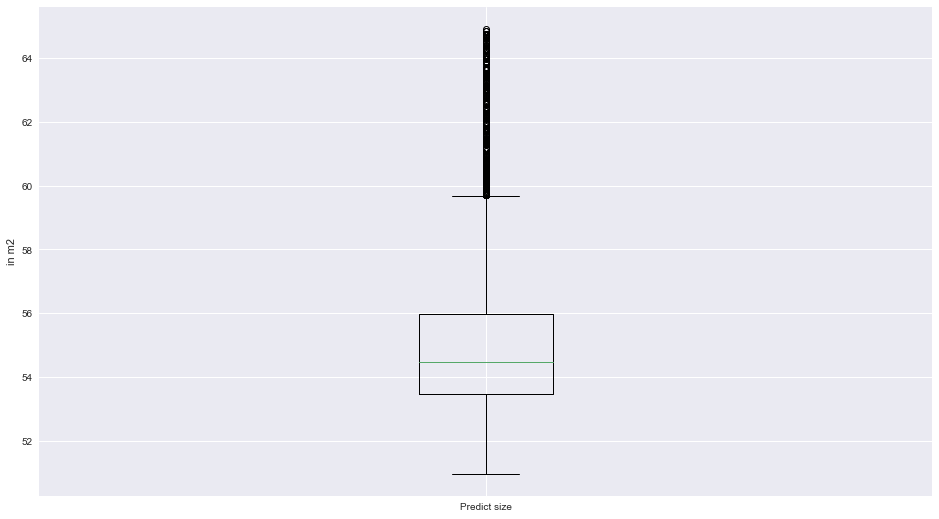

In [43]:
plt.rcParams["figure.figsize"]=[16,9]
plt.boxplot(newData["size"])
plt.xticks([1], ["Predict size"])
plt.ylabel('in m2')
plt.draw()
plt.savefig("figure12.png", bbox_inches="tight")